In [1]:
using Plots, LaTeXStrings, Optim, SpecialFunctions, Random,Distributions, Interpolations, Dierckx, NLopt, ForwardDiff, LinearAlgebra, Roots
gr();  #Load packages

In [2]:
function Stochastic(LX,LY,t1,A0,PM,ρ) #Stochastic model
T=Int(t1)
Q=Int(sum(A0));
pos = [(0, 0) for _ in 1:Q]
pos0 = [(0, 0) for _ in 1:Q]
NumAgent= zeros(LX) 
count = 0
for i in 1:LX
    for j in 1:LY
        if A0[i,j] > 0
        count += 1
        pos0[count] = (i,j)
        pos[count] = (i,j)
        end
    end
end


for kk in 1:T
Q = length(pos)
count = 0

    while count < Q
        # Choose a random particle to move
        idx = rand(1:Q)
        count = count + 1
        xx, yy = pos[idx]

        # Choose a direction: 1=up, 2=down, 3=left, 4=right
        RR=rand(1); dir = 0;
            
        if RR[1] > 0 && RR[1] <= 1/4
        dir = 1
        elseif RR[1] > 1/4 && RR[1] <= 1/2
        dir = 2
        elseif RR[1] > 1/2 && RR[1] <= (3-ρ)/4
        dir = 3
        elseif RR[1] > (3-ρ)/4 && RR[1] <= 1
        dir = 4
        end
            
        
        R=rand(1)
        if dir == 1 && yy < LY && yy >  1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy < LY && yy >  1 &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy < LY && yy >  1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy < LY && yy >  1 &&  R[1] <= PM
            xx += 1
        end

        if dir == 1 && yy == LY  &&  R[1] <= PM
            yy += 0
        elseif dir == 2 && yy == LY  &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy == LY  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy == LY  &&  R[1] <= PM
            xx += 1
        end

         if dir == 1 && yy ==1  &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy ==1  &&  R[1] <= PM
            yy -= 0
        elseif dir == 3 && yy ==1  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy ==1  &&  R[1] <= PM
            xx += 1
        end
        
        pos[idx] = (xx, yy)

    end


end




for i in 1:Q
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1    
end

return NumAgent,pos0,pos
end

Stochastic (generic function with 1 method)

In [3]:
function loglhood(count,a)  #loglikelihood function 
C(x)=LY*a[1]*(erf((h-x+a[3]*T)/sqrt(4*a[2]*T))+erf((h+x-a[3]*T)/sqrt(4*a[2]*T)))/2;
ℓ=0.0
ε=1.e-8
for i in 1:LX
λ = max(C(xxloc[i]),ε)
dist = Poisson(λ)
ℓ+=loglikelihood(dist,data[i])
end
return ℓ
end

loglhood (generic function with 1 method)

In [4]:
function Optimise(fun,θ₀,lb,ub) #NLopt routine
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_BOBYQA,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=1*60
    res = NLopt.optimize(opt,θ₀)
    return res[[2,1]]
end;

In [5]:
LX=200 #Stochastic simulation and surrogate problem definitions
LY=50
PM=1.0
ρ=0.5
D=PM/4
v=PM*ρ/2
T=100.0
U0=0.5
h=25

A0=zeros(LX,LY)
xxloc=zeros(LX)
yyloc=zeros(LY)
for i in 1:LX
    xxloc[i]=-LX/2+(i-1)
    for j in 1:LY
    R=rand()
    yyloc[j]=0+(j-1)
        if abs(xxloc[i]) <= h && R <= U0
        A0[i,j]=1.0
        end
    end
end

  0.143181 seconds (542.45 k allocations: 30.176 MiB, 94.54% compilation time)


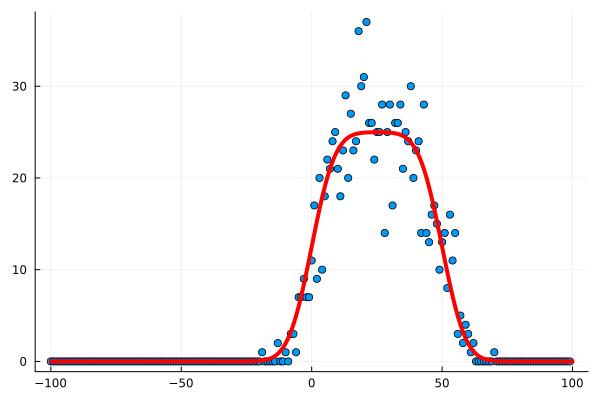

In [6]:
@time (data,pos0,pos)=Stochastic(LX,LY,T,A0,PM,ρ); #Calls the stochastic model, data below is the output used for reproducibility
data= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 1.0, 7.0, 7.0, 9.0, 7.0, 7.0, 11.0, 17.0, 9.0, 20.0, 10.0, 18.0, 22.0, 21.0, 24.0, 25.0, 21.0, 18.0, 23.0, 
    29.0, 20.0, 27.0, 23.0, 24.0, 36.0, 30.0, 31.0, 37.0, 26.0, 26.0, 22.0, 25.0, 25.0, 28.0, 14.0, 25.0, 28.0, 17.0, 26.0, 26.0, 28.0, 21.0, 25.0, 
    24.0, 30.0, 20.0, 23.0, 24.0, 14.0, 28.0, 14.0, 13.0, 16.0, 17.0, 15.0, 10.0, 13.0, 14.0, 8.0, 16.0, 11.0, 14.0, 3.0, 5.0, 2.0, 4.0, 3.0, 1.0, 
    2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
ue(x)=LY*U0*(erf((h-x+v*T)/sqrt(4*D*T))+erf((h+x-v*T)/sqrt(4*D*T)))/2;
p1 = scatter(xxloc,data,label=false)
p1 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false) #Create simple plot to compare stochastic simulation data and PDE solution

In [7]:
a=zeros(3) #function to call loglikelihood for NLopt
function funmle(a)
return loglhood(data,a)
end;

  0.330759 seconds (2.94 M allocations: 80.431 MiB, 7.75% gc time, 88.04% compilation time)


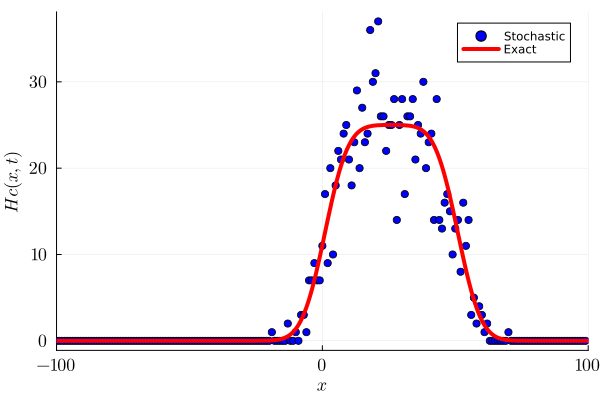

In [8]:
θG=[0.5,0.25, 0.25]
lb=[0.1,0.01,-0.5]
ub=[1.0,2.0, 0.5]
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)
Umle=xopt[1]
Dmle=xopt[2]
vmle=xopt[3]
fmle=fopt
C(x)=LY*xopt[1]*(erf((h-x+xopt[3]*T)/sqrt(4*xopt[2]*T))+erf((h+x-xopt[3]*T)/sqrt(4*xopt[2]*T)))/2;
p1=scatter(xxloc,data,mc=:blue,msc=:match,label="Stochastic")
p1=plot!(C,-LX/2,LX/2,lw=4,lc=:red,label="Exact",xlabel=L"x",ylabel=L"Hc(x,t)",xlims=(-100,100))
p1=plot!(xticks = ([-100,0,100],  [ L"-100", L"0", L"100" ]))
p1=plot!(yticks = ([0,10,20,30],[L"0", L"10", L"20", L"30"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(p1) #Computes the MLE and plots data and MLE solution as a visual check

In [9]:
xopt #Print out the MLE 

3-element Vector{Float64}:
 0.5003999960168052
 0.23603237056677526
 0.2597522674537135

In [10]:
df=1
llstar=-quantile(Chisq(df),0.95)/2; #Compute the asymptotic threshold loglikelihood value

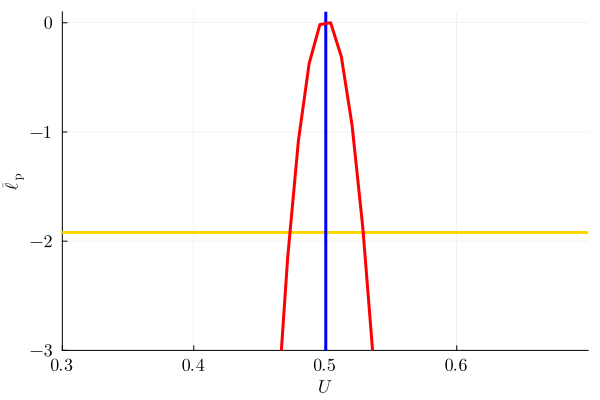

In [11]:
function univariateU(U) #Compute and plot univariate profile loglikelihood for U
    a=zeros(2)    
    function funU(a)
    return loglhood(data,[U,a[1],a[2]])
    end
    θG=[Dmle,vmle]
    lb=[0.01,-0.5] 
    ub=[2.0,0.5] 
    (xopt,fopt)=Optimise(funU,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateU(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
Urange=LinRange(0.30,0.70,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateU(Urange[i])[1]
    #println(i)
end

q1=hline([llstar],legend=false,lw=3,color=:gold)
q1=vline!([Umle],legend=false,xlabel=L"U",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(Urange,ff.-maximum(ff),w=ones(length(Urange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,Urange)
q1=plot!(Urange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(Urange[1],Urange[end]))
q1=plot!(xticks=([0.3,0.4,0.5,0.6],[L"0.3",L"0.4",L"0.5",L"0.6"]))
q1=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q1)

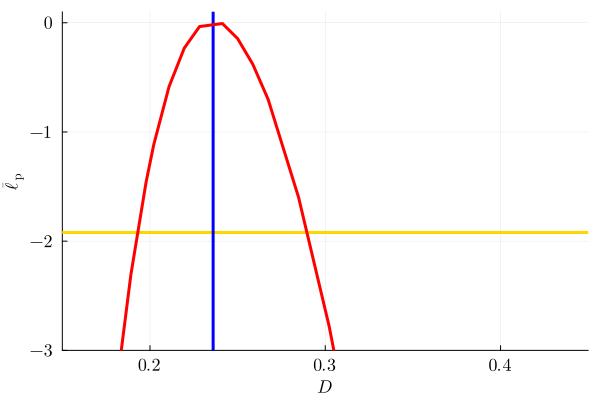

In [12]:
function univariateD(D) #Compute and plot univariate profile loglikelihood for D
    a=zeros(2)    
    function funD(a)
    return loglhood(data,[a[1],D,a[2]])
    end
    θG=[Umle,vmle]
    lb=[0.1,-0.5] 
    ub=[1.0,0.5] 
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateD(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=70;
Drange=LinRange(0.15,0.45,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1]
  #  println(i)
end

q2=hline([llstar],legend=false,lw=3,color=:gold)
q2=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,Drange)
q2=plot!(Drange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q2=plot!(xticks=([0.2,0.3,0.4],[L"0.2",L"0.3",L"0.4"]))
q2=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q2)

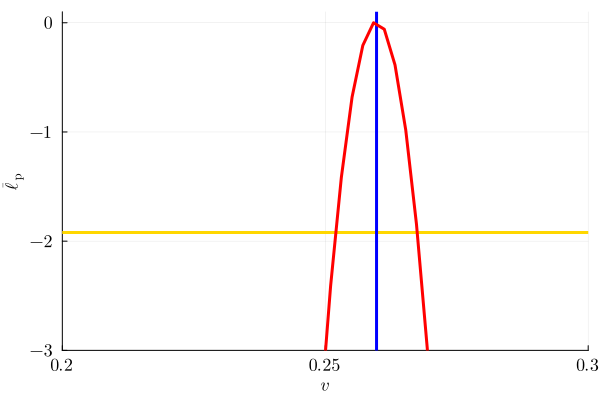

In [13]:
function univariatev(v) #Compute and plot univariate profile loglikelihood for v
    a=zeros(2)    
    function funv(a)
    return loglhood(data,[a[1],a[2],v])
    end
    θG=[Umle,Dmle]
    lb=[0.1,0.01] 
    ub=[1.0,2.0] 
    (xopt,fopt)=Optimise(funv,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariatev(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
vrange=LinRange(0.2,0.3,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariatev(vrange[i])[1]
  #  println(i)
end

q3=hline([llstar],legend=false,lw=3,color=:gold)
q3=vline!([vmle],legend=false,xlabel=L"v",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(vrange,ff.-maximum(ff),w=ones(length(vrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,vrange)
q3=plot!(vrange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(vrange[1],vrange[end]))
q3=plot!(xticks=([0.20, 0.25, 0.30],[L"0.2",L"0.25",L"0.3"]))
q3=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q3)

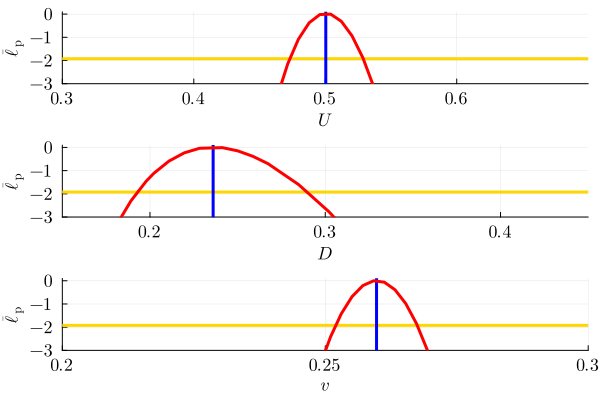

In [14]:
q4=plot(q1,q2,q3,layout=(3,1))
display(q4) #Figure 7(c)
#savefig(q4,"Profiles.pdf") 

In [15]:
fff(θ1,θ2,θ3) = funmle([θ1,θ2,θ3]) #Compute the observed Fisher Information at the MLE
H = -ForwardDiff.hessian(z -> fff(z[1],z[2],z[3]),xopt);
H = Symmetric(H) #Ensure the matrix is symmetric

3×3 Symmetric{Float64, Matrix{Float64}}:
 4996.0           -2.76144e-6      6.83994e-8
   -2.76144e-6  1671.91          429.677
    6.83994e-8   429.677       64281.8

In [16]:
Σ = inv(H);
mvnorm = MvNormal(xopt, Σ); #MVN distribution to invoke Laplace's approximation
M=1000
samples = rand(mvnorm, M); #Draw parameter samples

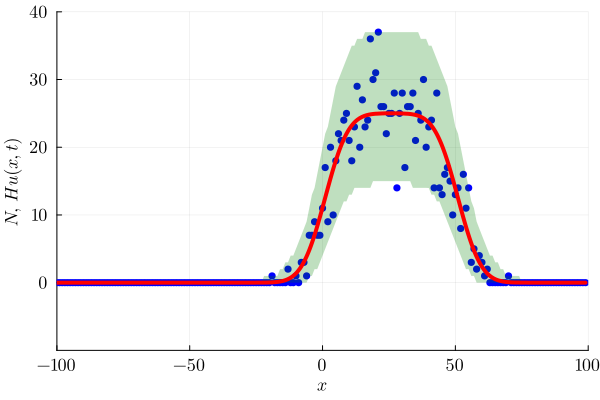

In [17]:
lower=zeros(length(xxloc));
upper=zeros(length(xxloc));

q25 = zeros((M,length(xxloc)));
q975 = zeros((M,length(xxloc)));

for i in 1:M
C(x)=LY*samples[1,i]*(erf((h-x+samples[3,i]*T)/sqrt(4*samples[2,i]*T))+erf((h+x-samples[3,i]*T)/sqrt(4*samples[2,i]*T)))/2;

    for j in 1:length(xxloc)
        q25[i,j] = quantile(Poisson(C(xxloc[j])),0.025)
        q975[i,j] = quantile(Poisson(C(xxloc[j])),0.975)
    end
end

for j in 1:length(xxloc)
    lower[j] = quantile(q25[:, j], 0.025);
    upper[j] = quantile(q975[:, j], 0.975);
end

C(x)=LY*Umle*(erf((h-x+vmle*T)/sqrt(4*Dmle*T))+erf((h+x-vmle*T)/sqrt(4*Dmle*T)))/2;
r2=scatter(xxloc,data,mc=:blue,msc=:auto,label=false)
r2=plot!(xxloc,lower,lw=0,fillrange=upper,fillalpha=0.25,color=:green,label=false,xlims=(-100,100),ylims=(-10,40))
r2=plot!(C,xxloc[1],xxloc[end],lw=4,label=false,xlabel=L"x",ylabel=L"N, \, H u(x,t)",color=:red)
r2=plot!(xticks = ([-100,-50,0,50,100],  [L"-100", L"-50", L"0", L"50", L"100"]))
r2=plot!(yticks = ([0,10,20,30,40],[L"0", L"10", L"20", L"30", L"40"]))
r2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(r2)

In [18]:
savefig(r2,"Predictions.pdf") 

"C:\\Users\\simpsom3\\Dropbox\\RW_Inference_Identifiability_Prediction\\TidyCodes4GitHub\\Predictions.pdf"